## Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part-Time
* Scheduled project review date/time: 9/1/21
* Instructor name: Claude Fried
* Blog post URL:


# Overview
Microsoft is looking to create a movie studio using the following movie datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

As a part of the Microsoft Film Analytics team, we are using our knowledge understand the given data to find which types of films are currently doing the best at the box office. 

## Business Problem
What type of films Microsoft should invest in to create a profitable and successful movie?

## Business Value

Many factors are considered into a production of a film. Funding, directors, genre, and ratings are highly regarded to avid movie goers. In order to maximize the success of Microsoft's movie production we will need to focus on the following questions:

- What genres are the most popular to consider?
- Which genre and movie ratings (G, PG, PG-13, R) generates the most profit?
- When is the best time to release a film?

Once we gather our information we will determine the recommendations Microsoft needs to release a film that will catch the eye of the audience. 

# What can we find from the data given to us?
We need to follow certain steps in order to find valuable information from our data.
1. Load and explore the data
2. Sort out what data we should use 
3. Find the information we need to gain insights

## What movie genre should we invest in?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

%matplotlib inline

In [2]:
# Load The Movie Data Base to get an overview of the data
tmdb_movies = 'tmdb.movies.csv.gz'

df_tmdb_movies = pd.read_csv(f'zippedData/{tmdb_movies}', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# Get general statistics of the numerical values
df_tmdb_movies_stats = df_tmdb_movies.describe()
df_tmdb_movies_stats

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Here are the stats of the 

In [4]:
# check for duplicates in the dataset
df_tmdb_movies[df_tmdb_movies.duplicated()]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [5]:
# drop the duplicates
df_tmdb_movies = df_tmdb_movies.drop_duplicates()
df_tmdb_movies
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [6]:
df_tmdb_movies = df_tmdb_movies.drop(["title", "original_language"], axis=1)
df_tmdb_movies

,genre_ids,id,original_title,popularity,release_date,vote_average,vote_count
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,6.8,12368
3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,7.9,10174
4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,Laboratory Conditions,0.600,2018-10-13,0.0,1
26513,"[18, 53]",485975,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
26514,"[14, 28, 12]",381231,The Last One,0.600,2018-10-01,0.0,1
26515,"[10751, 12, 28]",366854,Trailer Made,0.600,2018-06-22,0.0,1


In [7]:
# Import and inspect the data for inconsistencies
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [8]:
imbd_title_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
# Checks how many total missing values are in each column
imbd_title_data.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
# Remove the missing values 
imbd_title_data.dropna(subset=["genres","original_title", "runtime_minutes"], inplace=True)
imbd_title_data.info()
imbd_title_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [11]:
# Drop runtime_minutes and original title and double check if there are any missing values
imbd_title_data = imbd_title_data.drop(["original_title", "runtime_minutes"], axis = 1)
imbd_title_data.isna().sum()
imbd_title_data

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,Comedy
...,...,...,...,...
146134,tt9916160,Drømmeland,2019,Documentary
146135,tt9916170,The Rehearsal,2019,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,Documentary
146137,tt9916190,Safeguard,2019,"Drama,Thriller"


In [12]:
imbd_title_data = imbd_title_data.rename(columns={"primary_title": "original_title"})
imbd_title_data

,tconst,original_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,Comedy
...,...,...,...,...
146134,tt9916160,Drømmeland,2019,Documentary
146135,tt9916170,The Rehearsal,2019,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,Documentary
146137,tt9916190,Safeguard,2019,"Drama,Thriller"


In [14]:
imbd_tmdb_df = imbd_title_data.merge(df_tmdb_movies, on = "original_title",)
imbd_tmdb_df

,tconst,original_title,start_year,genres,genre_ids,id,popularity,release_date,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,2018,Drama,"[35, 18]",299782,9.800,2018-11-02,7.0,64
1,tt0192528,Heaven & Hell,2018,Drama,[18],567662,0.600,2018-11-06,7.5,2
2,tt0249516,Foodfight!,2012,"Action,Animation,Comedy","[16, 28, 35, 10751]",116977,4.705,2013-05-07,2.1,46
3,tt0255820,Return to Babylon,2013,"Biography,Comedy,Drama","[35, 18]",323498,0.877,2013-08-11,7.0,1
4,tt0285252,Life's a Beach,2012,Comedy,[35],112074,1.206,2010-01-01,3.2,3
...,...,...,...,...,...,...,...,...,...,...
18447,tt9595962,Grow,2018,Documentary,[],421557,0.600,2015-04-15,8.0,1
18448,tt9647790,Celia,2018,Documentary,[18],334204,1.400,2012-10-26,5.7,3
18449,tt9678886,Vacancy,2018,Documentary,"[35, 27]",475066,0.649,2017-10-27,9.0,1
18450,tt9814730,The Flare,2017,Sport,[],469698,0.600,2017-07-11,9.0,1


In [15]:
imbd_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18452 entries, 0 to 18451
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          18452 non-null  object 
 1   original_title  18452 non-null  object 
 2   start_year      18452 non-null  int64  
 3   genres          18452 non-null  object 
 4   genre_ids       18452 non-null  object 
 5   id              18452 non-null  int64  
 6   popularity      18452 non-null  float64
 7   release_date    18452 non-null  object 
 8   vote_average    18452 non-null  float64
 9   vote_count      18452 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ MB


In [16]:
imbd_tmdb_df = imbd_tmdb_df.drop(["tconst", "genre_ids", "id", "start_year"], axis = 1)
imbd_tmdb_df

,original_title,genres,popularity,release_date,vote_average,vote_count
0,The Other Side of the Wind,Drama,9.800,2018-11-02,7.0,64
1,Heaven & Hell,Drama,0.600,2018-11-06,7.5,2
2,Foodfight!,"Action,Animation,Comedy",4.705,2013-05-07,2.1,46
3,Return to Babylon,"Biography,Comedy,Drama",0.877,2013-08-11,7.0,1
4,Life's a Beach,Comedy,1.206,2010-01-01,3.2,3
...,...,...,...,...,...,...
18447,Grow,Documentary,0.600,2015-04-15,8.0,1
18448,Celia,Documentary,1.400,2012-10-26,5.7,3
18449,Vacancy,Documentary,0.649,2017-10-27,9.0,1
18450,The Flare,Sport,0.600,2017-07-11,9.0,1


In [17]:
# organize_multiple_genres = imbd_tmdb_df.genres.str.split(",", expand=True)
# organize_multiple_genres

def first_genre_listed(n):
    # Return only the first genre listed
    n = str(n)
    if n == '\\N':
        return ''
    return n.split(',')[0].strip()

imbd_tmdb_df['genres'] = imbd_tmdb_df['genres'].apply(first_genre_listed)

imbd_tmdb_df.head()

,original_title,genres,popularity,release_date,vote_average,vote_count
0,The Other Side of the Wind,Drama,9.800,2018-11-02,7.0,64
1,Heaven & Hell,Drama,0.600,2018-11-06,7.5,2
2,Foodfight!,Action,4.705,2013-05-07,2.1,46
3,Return to Babylon,Biography,0.877,2013-08-11,7.0,1
4,Life's a Beach,Comedy,1.206,2010-01-01,3.2,3


In [18]:
imbd_tmdb_df.describe()

,popularity,vote_average,vote_count
count,18452.000000,18452.000000,18452.000000
mean,3.760460,5.725493,277.780945
std,4.952827,1.750617,1139.241648
min,0.600000,0.000000,1.000000
25%,0.632000,4.800000,2.000000
50%,1.615000,5.900000,7.000000
75%,5.489000,6.800000,50.000000
max,80.773000,10.000000,22186.000000


In [19]:
# Ah that's more like it no more mixture of genres
top_5_genrecount = imbd_tmdb_df['genres'].value_counts()[:5]
top_5_genrecount

Drama          4456
Comedy         3190
Documentary    2926
Action         2113
Horror         1768
Name: genres, dtype: int64

[Text(0.5, 1.0, 'Genre vs. Popularity'),
 Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Popularity')]

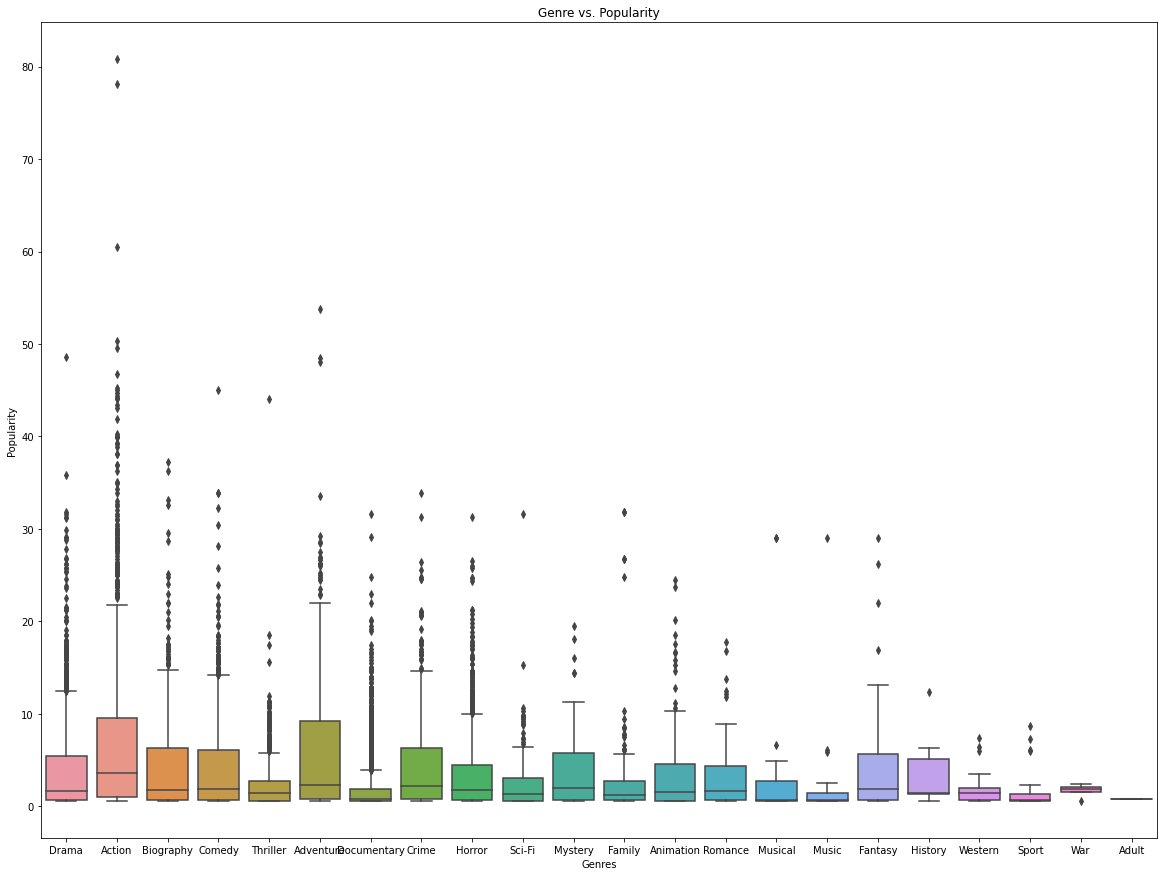

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.boxplot(data = imbd_tmdb_df, x= 'genres', y = 'popularity', ax = ax)
ax.set(title = "Genre vs. Popularity", xlabel = 'Genres', ylabel = 'Popularity')

Action, Adventure, Data, Comedy, and Thriller has the highest popularity rating.

In [21]:
# Sanity check to see if the boxplots are true
imbd_tmdb_df.sort_values('popularity', ascending=False)

,original_title,genres,popularity,release_date,vote_average,vote_count
14653,Avengers: Infinity War,Action,80.773,2018-04-27,8.3,13948
11642,John Wick,Action,78.123,2014-10-24,7.2,10081
15380,Spider-Man: Into the Spider-Verse,Action,60.534,2018-12-14,8.4,4048
9540,The Hobbit: The Battle of the Five Armies,Adventure,53.783,2014-12-17,7.3,8392
291,The Avengers,Action,50.289,2012-05-04,7.6,19673
...,...,...,...,...,...,...
3387,One Fall,Drama,0.600,2016-09-09,0.0,1
15431,Tap World,Documentary,0.600,2015-07-10,8.0,1
3376,Closets,Horror,0.600,2015-08-13,7.0,1
11979,Field Freak,Comedy,0.600,2014-12-31,3.0,4


In [22]:
movie_budgets = 'tn.movie_budgets.csv.gz'

df_movie_budgets = pd.read_csv(f'zippedData/{movie_budgets}')
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [23]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
def reformat_money(money):
    money = money.replace(',','')
    return int(money[1:])

df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].apply(reformat_money)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].apply(reformat_money)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].apply(reformat_money)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [25]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [26]:
# Create revenue column
revenue = df_movie_budgets['domestic_gross'] + df_movie_budgets['worldwide_gross']
profit = revenue - df_movie_budgets['production_budget']

df_movie_budgets['revenue'] = revenue
df_movie_budgets['profit'] = profit

# df_movie_budgets['revenue'] = revenue
df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [27]:
df_movie_budgets = df_movie_budgets.rename(columns={"movie": "original_title"})
df_movie_budgets

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,revenue,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977,282977
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676,-2324
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400


In [28]:
# Figure out how to merge these two by their title or maybe genre is better
# drop the 0 values and duplicates
# create visualization between genre and profit
# Popular genre vs profit
# figure out how popularity is rated


Which most popular movie genre has the highest profit?

In [29]:
imdb_tmdb_budgets = df_movie_budgets.merge(imbd_tmdb_df, on='original_title')
imdb_tmdb_budgets

,id,release_date_x,original_title,production_budget,domestic_gross,worldwide_gross,revenue,profit,genres,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,Horror,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,Action,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,Action,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,Action,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,Action,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,51,"Apr 21, 2015",Ten,25000,0,0,0,-25000,Adventure,1.575,2014-03-28,5.4,5
3527,51,"Apr 21, 2015",Ten,25000,0,0,0,-25000,Horror,1.575,2014-03-28,5.4,5
3528,54,"Dec 31, 2014",Dry Spell,22000,0,0,0,-22000,Comedy,0.600,2013-02-14,6.0,1
3529,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,0,-20000,Sci-Fi,2.078,2013-01-04,3.9,19


In [30]:
imdb_tmdb_budgets.duplicated(subset='id')

0       False
1       False
2       False
3       False
4       False
        ...  
3526     True
3527     True
3528     True
3529     True
3530     True
Length: 3531, dtype: bool

In [31]:
imdb_tmdb_budgets = imdb_tmdb_budgets.drop_duplicates(subset='id')
imdb_tmdb_budgets

,id,release_date_x,original_title,production_budget,domestic_gross,worldwide_gross,revenue,profit,genres,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,Horror,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,Action,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,Action,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,Action,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,Action,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,58,"Mar 9, 2018",A Wrinkle in Time,103000000,100478608,133401882,233880490,130880490,Adventure,12.529,2018-03-09,5.0,1073
686,63,"Oct 26, 2012",Cloud Atlas,102000000,27108272,130673154,157781426,55781426,Action,14.681,2012-10-26,6.8,4505
743,24,"Feb 6, 2015",Seventh Son,95000000,17725785,108874967,126600752,31600752,Action,22.856,2015-02-06,5.3,1549
968,6,"Oct 12, 2018",First Man,60000000,44936545,105203825,150140370,90140370,Biography,22.958,2018-10-12,7.1,2304


In [33]:
genres = imdb_tmdb_budgets['genres'].tolist()
genres

['Horror',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Action',
 'Drama',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Animation',
 'Animation',
 'Crime',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',